In [1]:
%load_ext autoreload
%autoreload 2
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
# auto reload local module

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl


In [3]:

from myscript.compute_centroid import center_centroid_celltype_id
from myscript.fit_exp_decay import *

In [4]:
CENTROIDS_DICT={
    '50': (191.08, 36.76),
    '75': (157.70, 139.18),
    '100': (150.82, 61.53),
    '200': (153.42, 109.96),
}

In [5]:
BATCH = 'shh_iter_500_steps_10'
INIT_BOX = '100'
INIT_SHH_CON = ''
SIMULATION_TIME = 200
STEPS = 10

INPUT_DIR = 'local/{:s}/shh_gradient_{:s}_out{:s}'.format(BATCH, INIT_BOX, INIT_SHH_CON)
INPUT_VTP = '{:s}/Cells_{:d}/Cells_{:d}_0.vtp'.format(INPUT_DIR, SIMULATION_TIME, SIMULATION_TIME)
INPUT_SHH = '{:s}/Cells_{:d}.npy'.format(INPUT_DIR, SIMULATION_TIME)
CONT_PLOT = '{:s}/fig/contourf_{:d}.png'.format(INPUT_DIR, SIMULATION_TIME // STEPS)

if not os.path.exists(INPUT_DIR): print('Please check dir again')
if not os.path.exists(INPUT_VTP): print('Please check vtp again')
if not os.path.exists(INPUT_SHH): print('Please check solver output again')

In [6]:
solver_mat = np.load(INPUT_SHH)
mean_x, mean_y = CENTROIDS_DICT[INIT_BOX]
x, y = get_xy_section(mean_x, mean_y, solver_mat)
x_avg, y_avg = get_xy_avg(mean_x, mean_y, solver_mat)

C0=0.0235  Lambda=20.5649 b=-0.0001


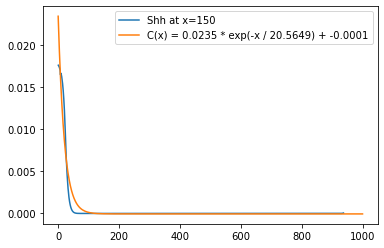

In [7]:
plot_and_fit(x, y, 'Shh at x={:d}'.format(int(mean_x)))

C0=0.0173  Lambda=21.2287 b=-0.0000


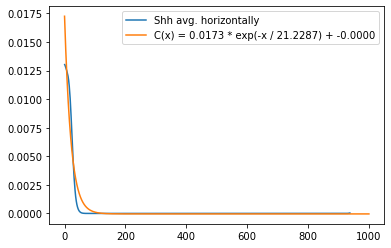

In [8]:
plot_and_fit(x_avg, y_avg, 'Shh avg. horizontally'.format(int(mean_x)))

From the plot below, the box outlet condition in LBIBCell probably is not open boundary


C0=0.0235  Lambda=20.5649 b=-0.0001


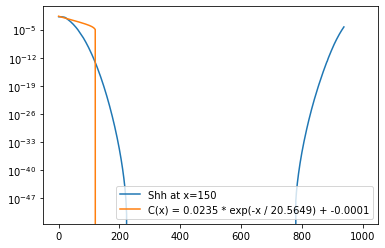

In [9]:
plot_and_fit(x, y, 'Shh at x={:d}'.format(int(mean_x)), log=1)

C0=0.0173  Lambda=21.2287 b=-0.0000


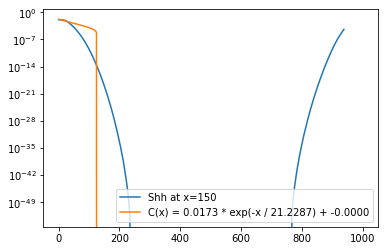

In [10]:
plot_and_fit(x_avg, y_avg, 'Shh at x={:d}'.format(int(mean_x)), log=1)